# Detailed usage

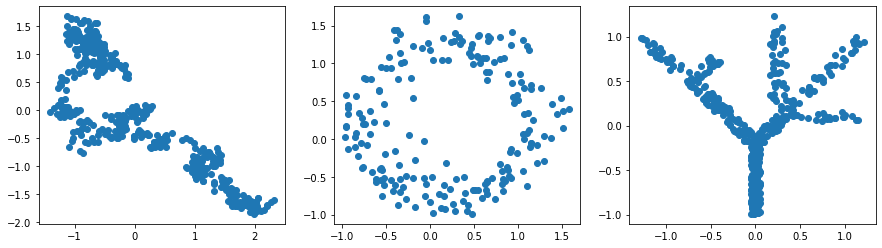

In [1]:
import elpigraph
import numpy as np
import matplotlib.pyplot as plt

# load toy data
X_curve = np.loadtxt('../data/curve_data.csv',delimiter=',')[:,:2]
X_circle = np.loadtxt('../data/circle_data.csv',delimiter=',')[:,:2]
X_tree = np.loadtxt('../data/tree_data.csv',delimiter=',')[:,:2]

f,axs=plt.subplots(1,3,figsize=(15,4))
axs[0].scatter(*X_curve.T)
axs[1].scatter(*X_circle.T)
axs[2].scatter(*X_tree.T)
plt.show()

## Fitting principal graphs
We can fit a principal graph with appropriate topology for each dataset, with specified number of graph nodes

In [2]:
pg_curve = elpigraph.computeElasticPrincipalCurve(X_curve,NumNodes=50)[0]
pg_circle = elpigraph.computeElasticPrincipalCircle(X_circle,NumNodes=50)[0]
pg_tree = elpigraph.computeElasticPrincipalTree(X_tree,NumNodes=50)[0]

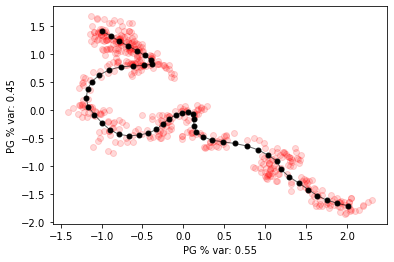

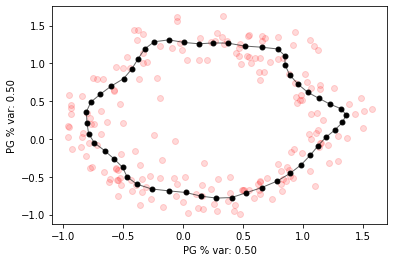

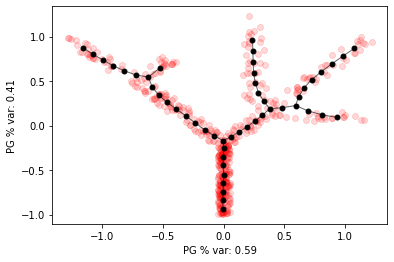

In [3]:
# plot graph (NodePositions and Edges) and data
elpigraph.plot.PlotPG(X_curve,pg_curve,Do_PCA=False)
elpigraph.plot.PlotPG(X_circle,pg_circle,Do_PCA=False)
elpigraph.plot.PlotPG(X_tree,pg_tree,Do_PCA=False)

Main parameters to tune are:
* NumNodes : the number of nodes of the graph 
* Lambda : the attractive strength of edges between nodes (constrains edge lengths)
* Mu : the repulsive strength of a node's neighboring nodes (constrains angles to be close to harmonic)
* alpha : branching penalty (penalizes number of branches for the principal tree)

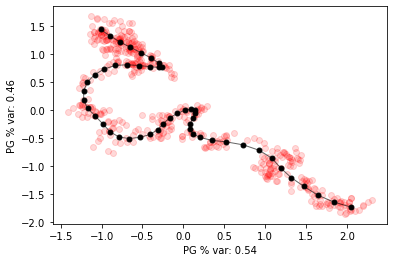

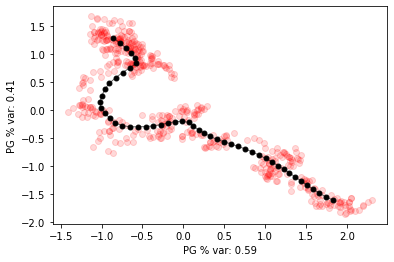

In [4]:
# illustrate tuning Lambda

pg_curve = elpigraph.computeElasticPrincipalCurve(X_curve,NumNodes=50,Lambda=0.001)[0]
elpigraph.plot.PlotPG(X_curve,pg_curve,Do_PCA=False)

pg_curve = elpigraph.computeElasticPrincipalCurve(X_curve,NumNodes=50,Lambda=0.1)[0]
elpigraph.plot.PlotPG(X_curve,pg_curve,Do_PCA=False)

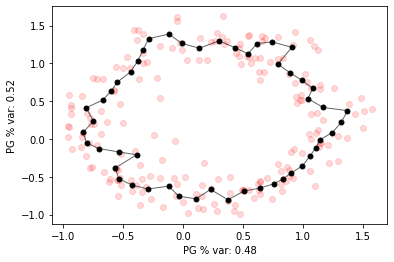

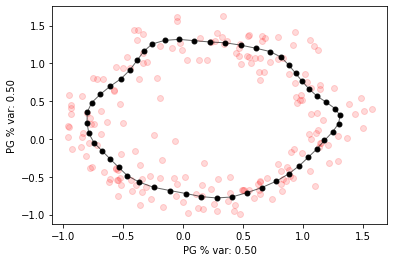

In [5]:
# illustrate tuning Mu

pg_curve = elpigraph.computeElasticPrincipalCircle(X_circle,NumNodes=50,Mu=0.001)[0]
elpigraph.plot.PlotPG(X_circle,pg_curve,Do_PCA=False)
pg_curve = elpigraph.computeElasticPrincipalCircle(X_circle,NumNodes=50,Mu=0.2)[0]
elpigraph.plot.PlotPG(X_circle,pg_curve,Do_PCA=False)

Computations can be sped up by reducing the number of candidate graphs topologies considered at each step.

This is especially useful for high number of nodes, where number of candidates starts growing fast

In [ ]:
%time pg_tree = elpigraph.computeElasticPrincipalTree(X_tree,50)[0]
%time pg_tree = elpigraph.computeElasticPrincipalTree(X_tree,50,MaxNumberOfGraphCandidatesDict={"AddNode2Node":20,"BisectEdge":10,"ShrinkEdge":10})[0]
elpigraph.plot.PlotPG(X_tree,pg_tree,Do_PCA=False)